In [1]:
from postprocessing import *
from scipy.optimize import curve_fit

In [2]:
simulation_directory = str('/n/holyscratch01/hernquist_lab/borodina/turb_drive_cooling/turb')
output_directory = simulation_directory+"/output/"
figures_directory = simulation_directory + "/output/figures/"

In [3]:
mpl.rcParams['figure.dpi']= 300

In [4]:
def linear(x, a, b):
    return a * x + b

In [ ]:
i_file = 0  # skip snap 0
fig, ax = plt.subplots(figsize=(6,4))

while True:
    i_file += 1
    filename = "powerspec_density_%03d.txt" % (i_file)

    try:
        psd = pd.read_csv(output_directory + filename, header=6, sep=' ', names=['k', 'density', 'c3', 'c4'])
    except: break
        
    if (i_file % 3) == 0 :
        snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')
        time = get_time_from_snap(snapshot)
        mask = psd['density'] > 0
        plt.plot(psd['k'][mask], psd['density'][mask], label="t=%.2f Myr"%(time * unit_time_in_megayr))
        ax.set_xscale('log')
        ax.set_yscale('log')
        mpl.rcParams['figure.dpi']= 300
        ax.set_xlabel('K', fontsize=15)
        ax.set_ylabel('density', fontsize=15)
plt.legend()

In [ ]:
i_file = 8
filename = "powerspec_density_%03d.txt" % (i_file)
psd = pd.read_csv(output_directory + filename, header=6, sep=' ', names=['k', 'density', 'c3', 'c4'])

log_density = np.log10(psd['density'][mask])
log_k = np.log10(psd['k'][mask])

In [ ]:
popt_turb, pcov = curve_fit(linear, log_k, log_density)

In [ ]:
i_file = 0  # skip snap 0
fig, ax = plt.subplots(figsize=(6,4))

while True:
    i_file += 1
    filename = "powerspec_density_%03d.txt" % (i_file)

    try:
        psd = pd.read_csv(output_directory + filename, header=6, sep=' ', names=['k', 'density', 'c3', 'c4'])
    except: break
        
    if (i_file % 3) == 0 :
        snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')
        time = get_time_from_snap(snapshot)
        mask = psd['density'] > 0
        plt.plot(psd['k'][mask], psd['density'][mask], label="t=%.2f Myr"%(time * unit_time_in_megayr))
        ax.set_xscale('log')
        ax.set_yscale('log')
        mpl.rcParams['figure.dpi']= 300
        ax.set_xlabel('K', fontsize=15)
        ax.set_ylabel('density', fontsize=15)

plt.plot(psd['k'][mask], 10 ** linear(np.log10(psd['k'][mask]), *popt_turb), c='b', 
         label=f'fit, power={popt_turb[0].round(1)}')
plt.legend()

In [ ]:
simulation_directory = str('/n/holyscratch01/hernquist_lab/borodina/turb_drive_cooling/jet')
output_directory = simulation_directory+"/output/"
figures_directory = simulation_directory + "/output/figures/"

In [ ]:
i_file = 0  # skip snap 0
fig, ax = plt.subplots(figsize=(6,4))

while True:
    i_file += 1
    filename = "powerspec_density_%03d.txt" % (i_file)

    try:
        psd = pd.read_csv(output_directory + filename, header=6, sep=' ', names=['k', 'density', 'c3', 'c4'])
    except: break
        
    if (i_file % 4) == 0 :
        
        snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')
        time = get_time_from_snap(snapshot)
        mask = psd['density'] > 0
        plt.plot(psd['k'][mask], psd['density'][mask], label="t=%.2f Myr"%(time * unit_time_in_megayr))
        ax.set_xscale('log')
        ax.set_yscale('log')
        mpl.rcParams['figure.dpi']= 300
        ax.set_xlabel('K', fontsize=15)
        ax.set_ylabel('density', fontsize=15)
plt.plot(10 ** log_k,10 ** log_density, label="before jet", c='gray')
plt.legend()

## velocity power spectra

In [23]:
turb_directory = str('/n/holyscratch01/hernquist_lab/borodina/turb_drive_cooling/turb/output/')

In [24]:
psv = pd.read_csv(turb_directory + 'powerspec_vel_009.txt', header=6, sep=' ', names=['k', 'vel', 'c3', 'c4'])
mask = psv['vel'] > 0

In [25]:
simulation_directory = str('/n/holyscratch01/hernquist_lab/borodina/turb_drive_cooling/jet')
output_directory = simulation_directory+"/output/"
figures_directory = simulation_directory + "/output/figures/"

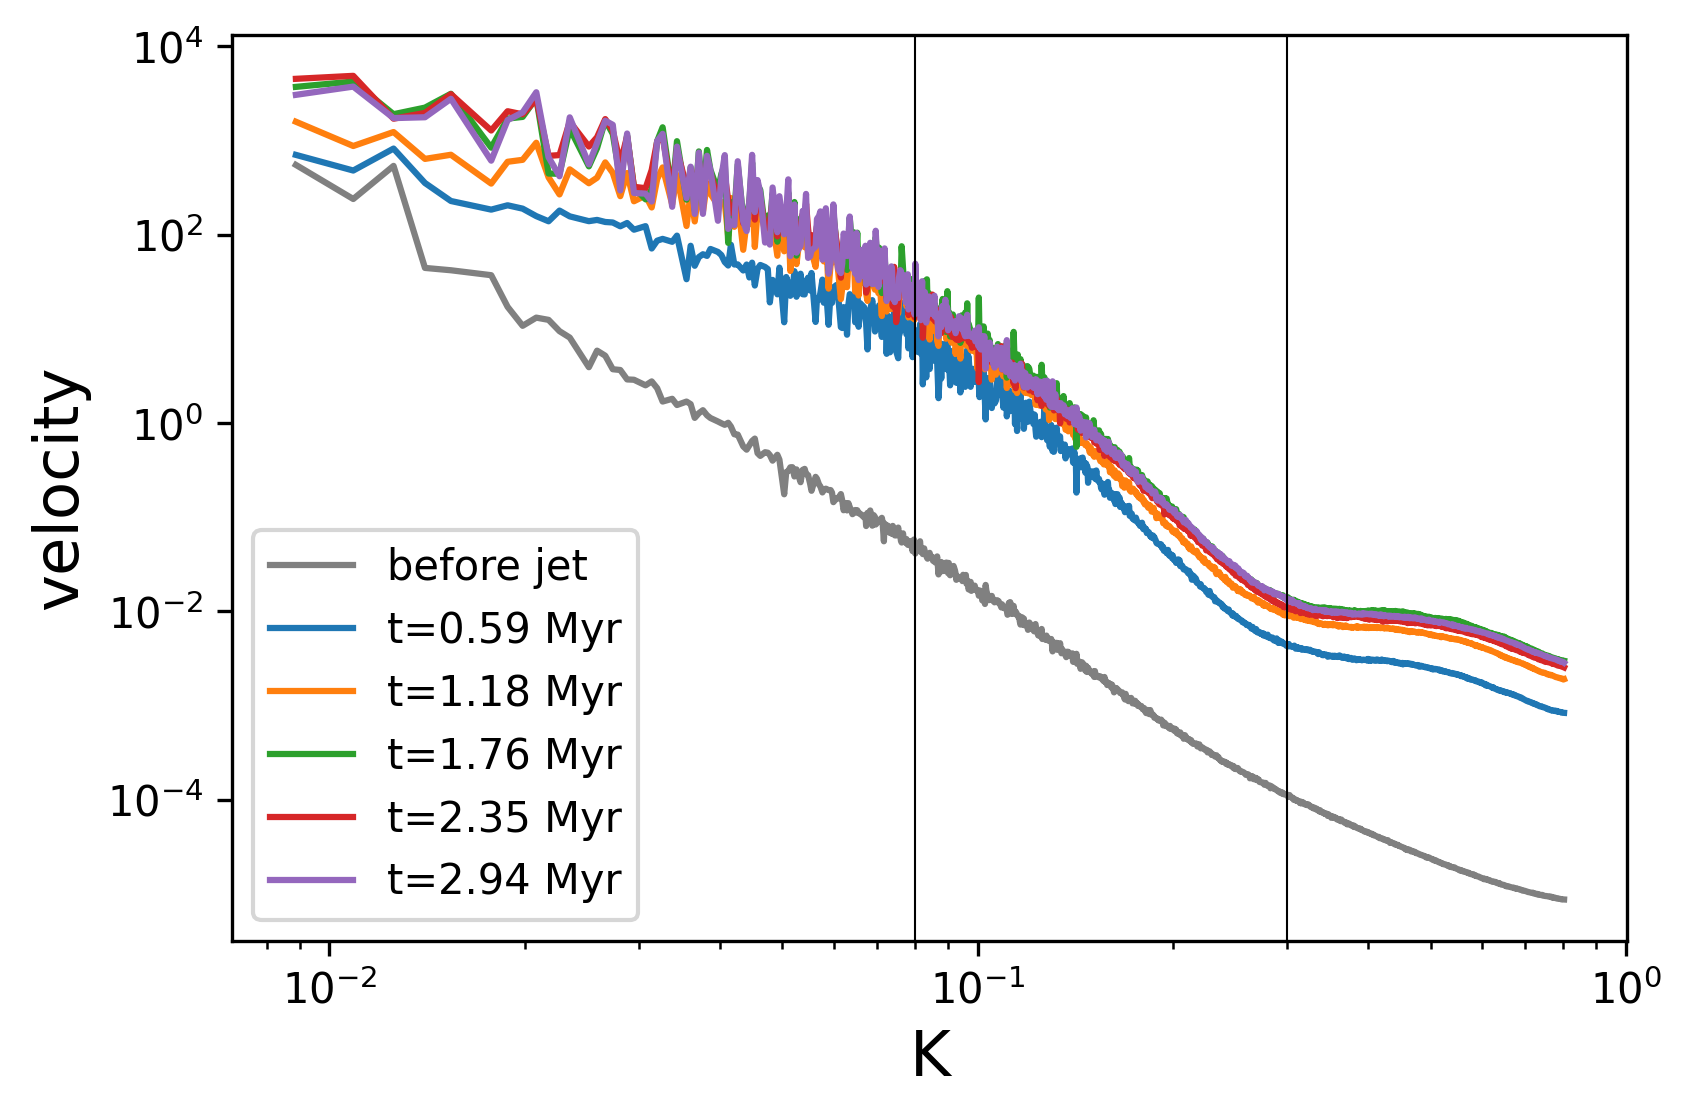

In [26]:
i_file = 0  # skip snap 0
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(psv['k'][mask], psv['vel'][mask], label="before jet", c='gray')
log_velocity_turb = np.log10(psv['vel'][mask])
log_k_turb = np.log10(psv['k'][mask])

while True:
    i_file += 1
    filename = "powerspec_vel_%03d.txt" % (i_file)

    try:
        psv = pd.read_csv(output_directory + filename, header=6, sep=' ', names=['k', 'vel', 'c3', 'c4'])
    except: break
    if (i_file % 4) == 0 :
        snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')
        time = get_time_from_snap(snapshot)
        plt.plot(psv['k'][mask], psv['vel'][mask], label="t=%.2f Myr"%(time * unit_time_in_megayr))
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('K', fontsize=15)
        ax.set_ylabel('velocity', fontsize=15)
ax.axvline(0.08, c='black', lw=0.5)
ax.axvline(0.3, c='black', lw=0.5)
plt.legend()

In [36]:
popt_turb, pcov = curve_fit(linear, log_k_turb, log_velocity_turb)

In [28]:
mask_low_k   = (psv['k'][mask] < 0.08)
mask_inter_k = (psv['k'][mask] > 0.08) & (psv['k'][mask] < 0.3)
mask_high_k  = (psv['k'][mask] > 0.3)

In [29]:
i_file = 8
filename = "powerspec_vel_%03d.txt" % (i_file)
psv = pd.read_csv(output_directory + filename, header=6, sep=' ', names=['k', 'vel', 'c3', 'c4'])

log_velocity = np.log10(psv['vel'][mask])
log_k = np.log10(psv['k'][mask])

In [30]:
popt_jet_low, pcov = curve_fit(linear, log_k[mask_low_k], log_velocity[mask_low_k])
popt_jet_inter, pcov = curve_fit(linear, log_k[mask_inter_k], log_velocity[mask_inter_k])
popt_jet_high, pcov = curve_fit(linear, log_k[mask_high_k], log_velocity[mask_high_k])

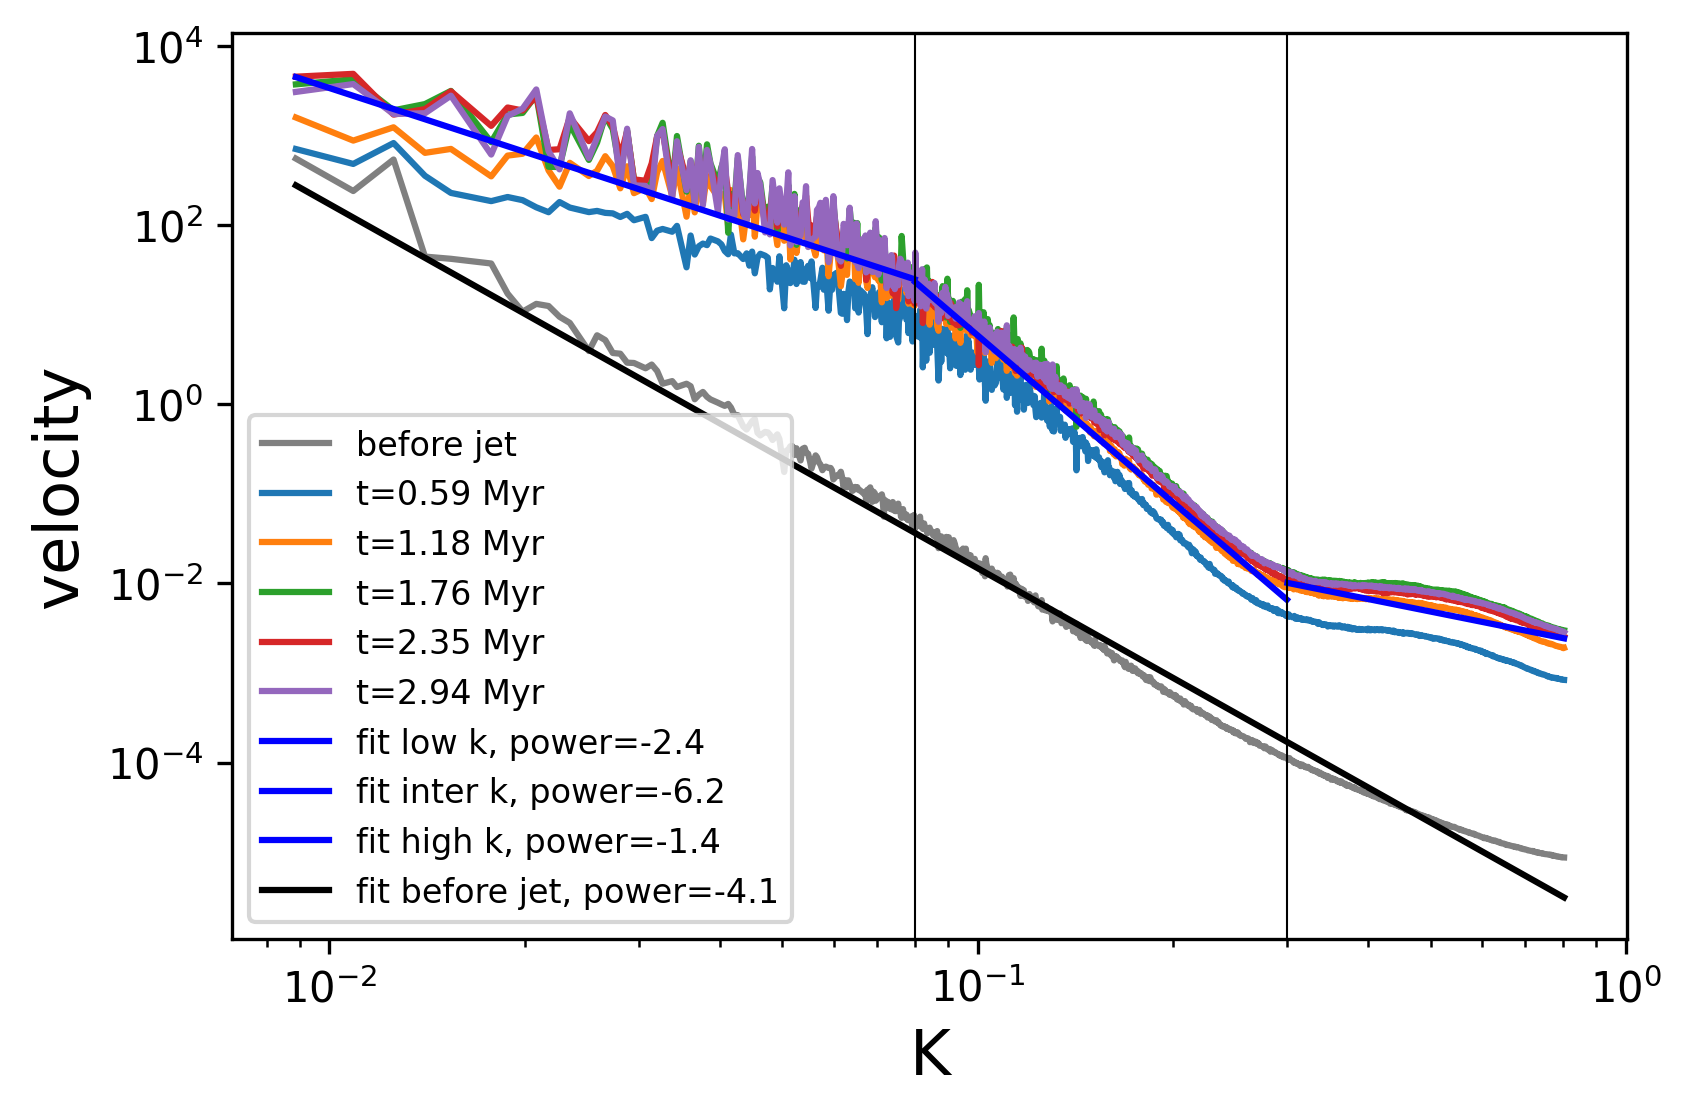

In [41]:
i_file = 0  # skip snap 0
fig, ax = plt.subplots(figsize=(6,4))
psv = pd.read_csv(turb_directory + 'powerspec_vel_009.txt', header=6, sep=' ', names=['k', 'vel', 'c3', 'c4'])
plt.plot(psv['k'][mask], psv['vel'][mask], label="before jet", c='gray')
while True:
    i_file += 1
    filename = "powerspec_vel_%03d.txt" % (i_file)

    try:
        psv = pd.read_csv(output_directory + filename, header=6, sep=' ', names=['k', 'vel', 'c3', 'c4'])
    except: break
    if (i_file % 4) == 0 :
        snapshot = h5py.File(output_directory +  "snap_%03d.hdf5" % (i_file),'r')
        time = get_time_from_snap(snapshot)
        plt.plot(psv['k'][mask], psv['vel'][mask], label="t=%.2f Myr"%(time * unit_time_in_megayr))
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlabel('K', fontsize=15)
        ax.set_ylabel('velocity', fontsize=15)
        
plt.plot(10 ** log_k[mask_low_k], 10 ** linear(log_k[mask_low_k], *popt_jet_low), c='b', 
         label=f'fit low k, power={popt_jet_low[0].round(1)}')
plt.plot(10 ** log_k[mask_inter_k], 10 ** linear(log_k[mask_inter_k], *popt_jet_inter), c='b', 
         label=f'fit inter k, power={popt_jet_inter[0].round(1)}')
plt.plot(10 ** log_k[mask_high_k], 10 ** linear(log_k[mask_high_k], *popt_jet_high), c='b', 
         label=f'fit high k, power={popt_jet_high[0].round(1)}')
plt.plot(10 ** log_k_turb, 10 ** linear(log_k_turb, *popt_turb), c='black', 
         label=f'fit before jet, power={popt_turb[0].round(1)}')

ax.axvline(0.08, c='black', lw=0.5)
ax.axvline(0.3, c='black', lw=0.5)

plt.legend(fontsize=8)